In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os

import warnings
warnings.filterwarnings('ignore')

print(os.listdir('../data/mashroom'))

['.DS_Store', 'train.tsv', 'output', 'test.tsv', '.ipynb_checkpoints']


In [2]:
df_train = pd.read_csv('../data/mashroom/train.tsv', delimiter='\t')
df_test = pd.read_csv('../data/mashroom/test.tsv', delimiter='\t')
print(df_train.shape, df_test.shape)

(4062, 24) (4062, 23)


In [3]:
def kesson_table(df):
    total = df.isnull().sum()
    percent = total / len(df) * 100
    kesson_table = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    kesson_table = kesson_table.drop(kesson_table[kesson_table == 0].index.sort_values(ascending=False))
    return kesson_table

In [4]:
df_train.head()

,id,Y,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,p,f,y,n,f,f,f,c,n,...,k,w,w,p,w,o,e,w,v,d
1,2,p,f,y,y,f,f,f,c,b,...,k,b,p,p,w,o,l,h,y,g
2,3,e,b,y,w,t,l,f,c,b,...,s,w,w,p,w,o,p,k,n,m
3,5,p,x,s,b,t,f,f,c,b,...,s,w,w,p,w,o,p,h,v,u
4,7,p,x,s,w,t,f,f,c,b,...,f,w,w,p,w,o,p,h,v,g


In [5]:
df_train.columns

Index(['id', 'Y', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

Y            e    p
cap-shape          
b          227   17
c            0    3
f          818  755
k          115  308
s           10    0
x          933  876


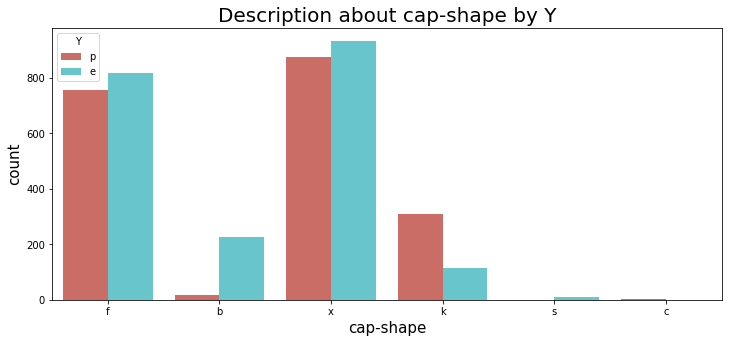

In [6]:
print(pd.crosstab(df_train['cap-shape'], df_train['Y']))

plt.figure(figsize=(12, 5))
sns.countplot(x='cap-shape', data=df_train, hue='Y', palette='hls')
plt.title('Description about cap-shape by Y', fontsize=20)
plt.xlabel('cap-shape', fontsize=15)
plt.ylabel('count', fontsize=15)

plt.show()

In [7]:
df_train['cap-shape'][(df_train['cap-shape']=='b') | (df_train['cap-shape']=='s')] = 1
df_train['cap-shape'][(df_train['cap-shape']=='f') | (df_train['cap-shape']=='x')
                      | (df_train['cap-shape']=='k') | (df_train['cap-shape']=='k') | (df_train['cap-shape']=='c')] = 0


In [8]:
df_train['cap-shape'][(df_train['cap-shape']=='b') | (df_train['cap-shape']=='s')] = 1
df_train['cap-shape'][ (df_train['cap-shape']!='b') & (df_train['cap-shape']!='s') & (df_train['cap-shape'] != 1)] = 0

In [9]:
df_train['cap-shape'].value_counts()

0    3808
1     254
Name: cap-shape, dtype: int64

In [10]:
def train_change_test(string):
    changed = string.replace('train', 'test')
    return changed

In [11]:
train_change_test("df_train['cap-shape'][(df_train['cap-shape']=='b') | (df_train['cap-shape']=='s')] = 1 \
df_train['cap-shape'][ (df_train['cap-shape']!='b') & (df_train['cap-shape']!='s') & (df_train['cap-shape'] != 1)] = 0")

"df_test['cap-shape'][(df_test['cap-shape']=='b') | (df_test['cap-shape']=='s')] = 1 df_test['cap-shape'][ (df_test['cap-shape']!='b') & (df_test['cap-shape']!='s') & (df_test['cap-shape'] != 1)] = 0"

In [12]:
df_test['cap-shape'][(df_test['cap-shape']=='b') | (df_test['cap-shape']=='s')] = 1
df_test['cap-shape'][ (df_test['cap-shape']!='b') & (df_test['cap-shape']!='s') & (df_test['cap-shape'] != 1)] = 0

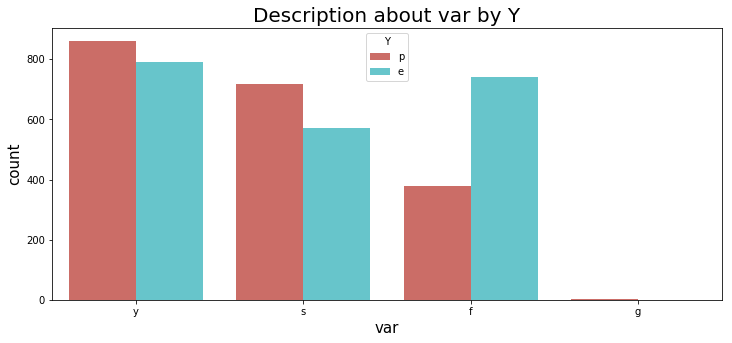

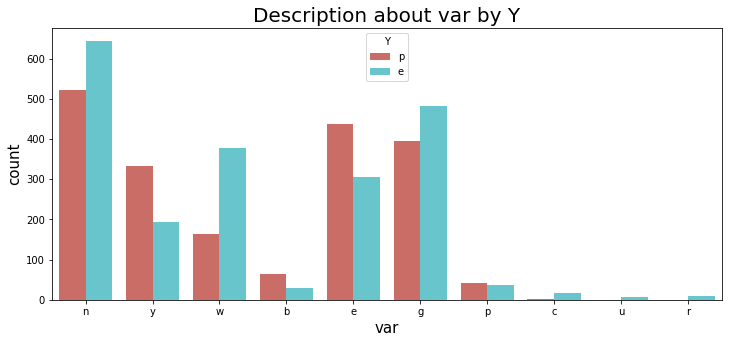

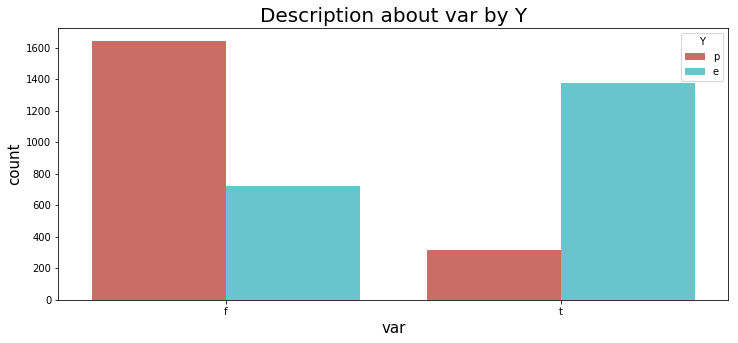

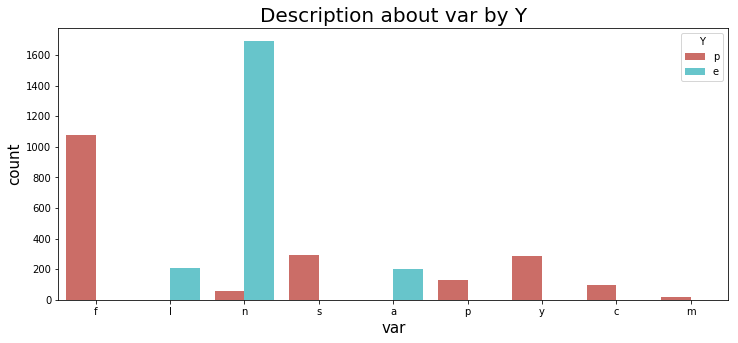

In [13]:
plt.figure(figsize=(12, 5))
sns.countplot(x='cap-surface', data=df_train, hue='Y', palette='hls')
plt.title('Description about var by Y', fontsize=20)
plt.xlabel('var', fontsize=15)
plt.ylabel('count', fontsize=15)

plt.show()

plt.figure(figsize=(12, 5))
sns.countplot(x='cap-color', data=df_train, hue='Y', palette='hls')
plt.title('Description about var by Y', fontsize=20)
plt.xlabel('var', fontsize=15)
plt.ylabel('count', fontsize=15)

plt.show()

plt.figure(figsize=(12, 5))
sns.countplot(x='bruises', data=df_train, hue='Y', palette='hls')
plt.title('Description about var by Y', fontsize=20)
plt.xlabel('var', fontsize=15)
plt.ylabel('count', fontsize=15)

plt.show()

plt.figure(figsize=(12, 5))
sns.countplot(x='odor', data=df_train, hue='Y', palette='hls')
plt.title('Description about var by Y', fontsize=20)
plt.xlabel('var', fontsize=15)
plt.ylabel('count', fontsize=15)

plt.show()

In [14]:
columns = ['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat']
prefix = ['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat']

df_train = pd.get_dummies(df_train, columns=columns, prefix=prefix, drop_first=True)
df_test = pd.get_dummies(df_test, columns=columns, prefix=prefix, drop_first=True)

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [16]:
train = df_train.drop(['id', 'Y'], axis=1)
train_ = df_train['Y']
train_[train_ == 'p'] = 0
train_[train_== 'e'] = 1
test = df_test.drop(['id'], axis=1)

X_train = sc.fit_transform(train.values)
y_train = train_.values
X_test = sc.fit_transform(test.values)

In [17]:
print(X_train.shape, X_test.shape, y_train.shape)

(4062, 91) (4062, 91) (4062,)


In [18]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

Using TensorFlow backend.


In [19]:
model = Sequential()

model.add(Dense(10, activation='relu', input_dim=91, kernel_initializer='uniform'))
model.add(Dropout(0.4))
model.add(Dense(100, activation='relu', kernel_initializer='uniform'))
model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid', kernel_initializer='uniform'))

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                920       
_________________________________________________________________
dropout_1 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               1100      
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 2,121
Trainable params: 2,121
Non-trainable params: 0
___________________

In [20]:
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train,validation_split=0.2, batch_size=50, epochs=100, verbose=1)

scores = model.evaluate(X_train, y_train, batch_size=20)
print('%s : %.2f%%' % (model.metrics_names[1], scores[1]*100))

Instructions for updating:
Use tf.cast instead.
Train on 3249 samples, validate on 813 samples
Epoch 1/100
3249/3249 [==============================] - 1s 232us/step - loss: 0.5782 - acc: 0.7596 - val_loss: 0.3129 - val_acc: 0.9471
Epoch 2/100
3249/3249 [==============================] - 0s 49us/step - loss: 0.1912 - acc: 0.9818 - val_loss: 0.0710 - val_acc: 0.9902
Epoch 3/100
3249/3249 [==============================] - 0s 44us/step - loss: 0.0892 - acc: 0.9963 - val_loss: 0.0320 - val_acc: 0.9963
Epoch 4/100
3249/3249 [==============================] - 0s 45us/step - loss: 0.0488 - acc: 0.9988 - val_loss: 0.0194 - val_acc: 0.9963
Epoch 5/100
3249/3249 [==============================] - 0s 49us/step - loss: 0.0355 - acc: 0.9969 - val_loss: 0.0125 - val_acc: 0.9988
Epoch 6/100
3249/3249 [==============================] - 0s 48us/step - loss: 0.0226 - acc: 0.9985 - val_loss: 0.0090 - val_acc: 0.9988
Epoch 7/100
3249/3249 [==============================] - 0s 43us/step - loss: 0.0217 - a

Epoch 58/100
3249/3249 [==============================] - 0s 85us/step - loss: 0.0084 - acc: 0.9988 - val_loss: 6.8430e-04 - val_acc: 1.0000
Epoch 59/100
3249/3249 [==============================] - 0s 91us/step - loss: 0.0042 - acc: 0.9994 - val_loss: 8.1478e-04 - val_acc: 1.0000
Epoch 60/100
3249/3249 [==============================] - 0s 45us/step - loss: 0.0069 - acc: 0.9991 - val_loss: 0.0018 - val_acc: 0.9988
Epoch 61/100
3249/3249 [==============================] - 0s 66us/step - loss: 0.0044 - acc: 0.9994 - val_loss: 0.0018 - val_acc: 0.9988
Epoch 62/100
3249/3249 [==============================] - 0s 65us/step - loss: 0.0050 - acc: 0.9994 - val_loss: 0.0017 - val_acc: 1.0000
Epoch 63/100
3249/3249 [==============================] - 0s 46us/step - loss: 0.0046 - acc: 0.9994 - val_loss: 0.0016 - val_acc: 1.0000
Epoch 64/100
3249/3249 [==============================] - 0s 47us/step - loss: 0.0102 - acc: 0.9985 - val_loss: 0.0018 - val_acc: 0.9988
Epoch 65/100
3249/3249 [=========

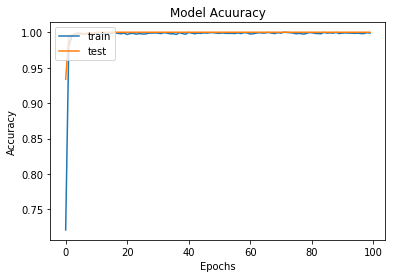

In [90]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Acuuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

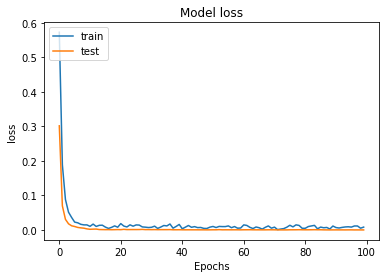

In [91]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [95]:
predict = np.round(model.predict(X_test))

df_out = pd.read_csv('../data/mashroom/test.tsv', delimiter='\t')
df_out['Y'] = predict
df_out['Y'][df_out['Y'] == 1] = 'p'
df_out['Y'][df_out['Y'] == 0] = 'e'

df_out[['id', 'Y']].to_csv('../data/mashroom/output/summit.csv', index=False, header=False)